# NetCDF files

NetCDF is a binary storage format for many different kinds of rectangular data. Examples include atmosphere and ocean model output, satellite images, and timeseries data. NetCDF files are intended to be device independent, and the dataset may be queried in a fast, random-access way. More information about NetCDF files can be found [here](http://www.unidata.ucar.edu/software/netcdf/). The [CF conventions](http://cfconventions.org) are used for storing NetCDF data for earth system models, so that programs can be aware of the coordinate axes used by the data cubes.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cmocean.cm as cmo

import netCDF4

### Sea surface temperature example

An example NetCDF file containing monthly means of sea surface temperature over 160 years can be found [here](http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v4.html). We'll use the NetCDF4 package to read this file, which has already been saved into the `data` directory.

In [18]:
nc = netCDF4.Dataset('../data/sst.mnmean.v4.nc')
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    history: created 10/2014 by CAS using NCDC's ERSST V4 ascii values
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    citation: Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.
    comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    Conventions: CF-1.2
    institution: This version written at NOAA/ES

The representation of the object shows some of the attributes of the netCDF file. The final few lines show the dimensions and the variable names (with corresponding dimensions). Another representation of the file can be seen using the `ncdump` command. This is similar to the output of the command (at a command-line prompt, not within python) 

    $ ncdump -h ../data/sst.mnmean.v4.nc
     
    netcdf sst.mnmean.v4 {
    dimensions:
        lon = 180 ;
        lat = 89 ;
        nbnds = 2 ;
        time = UNLIMITED ; // (1946 currently)
    variables:
        float lat(lat) ;
            lat:units = "degrees_north" ;
            lat:long_name = "Latitude" ;
            lat:actual_range = 88.f, -88.f ;
            lat:standard_name = "latitude" ;
            lat:axis = "Y" ;
            lat:coordinate_defines = "center" ;
        float lon(lon) ;
            lon:units = "degrees_east" ;
            lon:long_name = "Longitude" ;
            lon:actual_range = 0.f, 358.f ;
            lon:standard_name = "longitude" ;
            lon:axis = "X" ;
            lon:coordinate_defines = "center" ;
        double time_bnds(time, nbnds) ;
            time_bnds:long_name = "Time Boundaries" ;
        double time(time) ;
            time:units = "days since 1800-1-1 00:00:00" ;
            time:long_name = "Time" ;
            time:delta_t = "0000-01-00 00:00:00" ;
            time:avg_period = "0000-01-00 00:00:00" ;
            time:prev_avg_period = "0000-00-07 00:00:00" ;
            time:standard_name = "time" ;
            time:axis = "T" ;
            time:actual_range = 19723., 78923. ;
        float sst(time, lat, lon) ;
            sst:long_name = "Monthly Means of Sea Surface Temperature" ;
            sst:units = "degC" ;
            sst:var_desc = "Sea Surface Temperature" ;
            sst:level_desc = "Surface" ;
            sst:statistic = "Mean" ;
            sst:missing_value = -9.96921e+36f ;
            sst:actual_range = -1.8f, 33.95f ;
            sst:valid_range = -5.f, 40.f ;
            sst:dataset = "NOAA Extended Reconstructed SST V4" ;
            sst:parent_stat = "Individual Values" ;

    // global attributes:
            :history = "created 10/2014 by CAS using NCDC\'s ERSST V4 ascii values" ;
    [....and so on....]

### Mapping the netcdf object to the python object

We can query the data within the NetCDF file using the NetCDF object. The structure of the object (the composition of the methods and attributes) is designed to mirror the data structure in the file. See how these queries give the same information as the textual representation above.

In [19]:
# `Global` attributes of the file
nc.history

"created 10/2014 by CAS using NCDC's ERSST V4 ascii values"

In [20]:
# Variables are stored in a dictionary
nc.variables['lon']  # this is a variable object, just a pointer to the variable. NO DATA HAS BEEN LOADED!

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [   0.  358.]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [21]:
# Variable objects also have attributes
nc.variables['lon'].units

'degrees_east'

In [22]:
# we can also query the dimensions
nc.dimensions['lon']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180

In [23]:
# to find the length of a dimension, do
len(nc.dimensions['lon'])

180

In [24]:
# A list of the dimensions can be found by looking at the keys in the dimensions dictionary
nc.dimensions.keys()

odict_keys(['lon', 'lat', 'nbnds', 'time'])

In [25]:
# Same for variables
nc.variables.keys()

odict_keys(['lat', 'lon', 'time_bnds', 'time', 'sst'])

In [26]:
# Let's take a look at the main 3D variable
nc['sst'] # A shorthand for nc.variables['sst']

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    missing_value: -9.96921e+36
    actual_range: [ -1.79999995  33.95000076]
    valid_range: [ -5.  40.]
    dataset: NOAA Extended Reconstructed SST V4
    parent_stat: Individual Values
unlimited dimensions: time
current shape = (1946, 89, 180)
filling on, default _FillValue of 9.969209968386869e+36 used

In [27]:
nc['sst'].units

'degC'

---
### *Exercise*

> Inspect the NetCDF object. 

>  1. What are the units of the time variable?
>  1. What are the dimensions of the latitude variable?
>  1. What is the length of the latitude dimension?

---

In [28]:
#1
nc['time'].units

'days since 1800-1-1 00:00:00'

In [33]:
nc['sst'].dimensions

('time', 'lat', 'lon')

In [29]:
len(nc.dimensions['lat'])

89

In [34]:
# We can extract data from the file by indexing:
lon = nc['lon'][:]
lat = nc['lat'][:]
sst = nc['sst'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.

In [43]:
from datetime import datetime, timedelta

d0 = datetime(1800, 1, 1)
dt = timedelta(days=19723)
print(d0 + dt)


1854-01-01 00:00:00


In [44]:
# Extract the time variable using the convenient num2date, which converts from time numbers to datetime objects
time = netCDF4.num2date(nc['time'][:], nc['time'].units)

In [47]:
netCDF4.num2date?

In [53]:
time[0].isoformat()

'1854-01-01T00:00:00'

In [58]:
proj = cartopy.crs.Robinson(central_longitude=180)
fig = plt.figure(figsize=(14,6))

frame = 0
for tidx in range(0, len(time), 12):
    plt.clf()
    sst = nc['sst'][tidx]
    ax = fig.add_subplot(111, projection=proj)
    ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
    mappable = ax.contourf(lon, lat, sst, cmap=cmo.thermal, transform=cartopy.crs.PlateCarree())
    ax.set_title(time[tidx].isoformat())
    fig.colorbar(mappable).set_label(r'Sea Surface Temperature [$^\circ$C]')
    plt.savefig('frame_%04d.png' % frame)
    frame += 1

ValueError: A LinearRing must have at least 3 coordinate tuples

ValueError: A LinearRing must have at least 3 coordinate tuples

### THREDDS example. Loading data from a remote dataset.

The netCDF library can be compiled such that it is 'THREDDS enabled', which means that you can put in a URL instead of a filename. This allows access to large remote datasets, without having to download the entire file. You can find a large list of datasets served via an OpenDAP/THREDDs server [here](http://apdrc.soest.hawaii.edu/data/data.php).

Let's look at the ESRL/NOAA 20th Century Reanalysis – Version 2. You can access the data by the following link (this is the link of the `.dds` and `.das` files without the extension.):

In [ ]:
     http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel/V2c/cprat

In [60]:
nc_cprat = netCDF4.Dataset('http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel/V2c/cprat')

In [61]:
nc_cprat['cprat'].long_name

'daily convective precipitation rate (kg/m^2/s) '

In [62]:
time = netCDF4.num2date(nc_cprat['time'][:], nc_cprat['time'].units)

In [64]:
time

array([datetime.datetime(1851, 1, 1, 0, 0),
       datetime.datetime(1851, 1, 2, 0, 0),
       datetime.datetime(1851, 1, 3, 0, 0), ...,
       datetime.datetime(2014, 12, 29, 0, 0),
       datetime.datetime(2014, 12, 30, 0, 0),
       datetime.datetime(2014, 12, 31, 0, 0)], dtype=object)

In [65]:
cprat = nc_cprat['cprat'][-1]   # get the last time, datetime.datetime(2012, 12, 31, 0, 0)
lon = nc_cprat['lon'][:]
lat = nc_cprat['lat'][:]

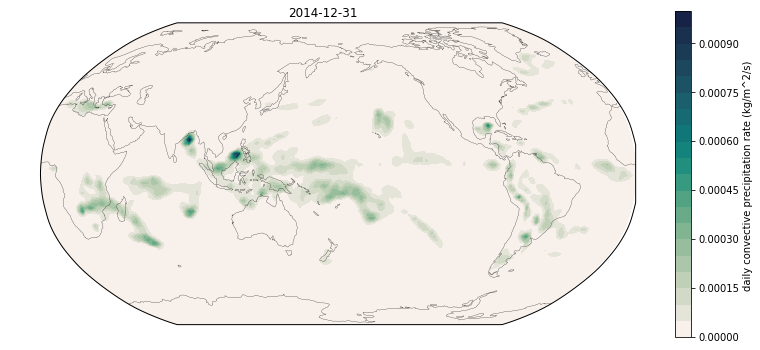

In [66]:
proj = cartopy.crs.Robinson(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.25)
mappable = ax.contourf(lon, lat, cprat, 20, cmap=cmo.tempo, transform=cartopy.crs.PlateCarree())
ax.set_title(time[-1].isoformat()[:10])
fig.colorbar(mappable).set_label('%s' % nc_cprat['cprat'].long_name)

---
### *Exercise*

> Pick another [variable](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel) from this dataset. Inspect and plot the variable in a similar manner to precipitation.

> Find another dataset on a THREDDS server at SOEST (or elsewhere), pick a variable, and plot it.

---

In [75]:
nc_mdot = netCDF4.Dataset('http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/MDOT/mdot30')

In [103]:
mdot = nc_mdot['mdot'][-1,:-10:2,::2]   # get the last time, datetime.datetime(2012, 12, 31, 0, 0)
lon = nc_mdot['lon'][::2]
lat = nc_mdot['lat'][:-10:2]


In [104]:
mdot.shape, lon.shape, lat.shape

((334, 720), (720,), (334,))

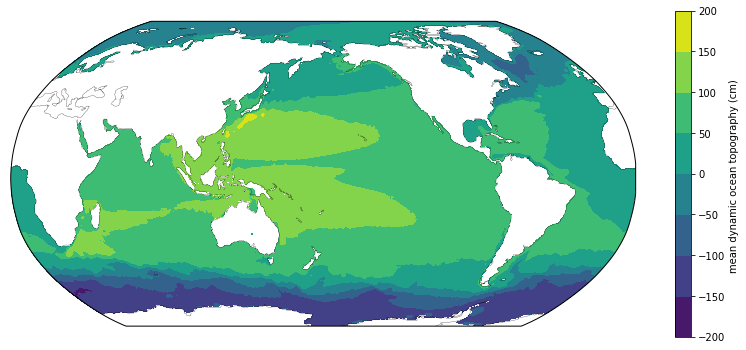

In [106]:
proj = cartopy.crs.Robinson(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.25)
mappable = ax.contourf(lon, lat, mdot, c=np.linspace(-200, 200, 41), cmap='viridis', transform=cartopy.crs.PlateCarree())
# ax.set_title(time[-1].isoformat()[:10])
fig.colorbar(mappable).set_label('%s' % nc_mdot['mdot'].long_name)

### Creating NetCDF files

We can also create a NetCDF file to store data.

In [ ]:
from matplotlib import tri

Ndatapoints = 1000
Ntimes = 20
Nbad = 200

xdata = np.random.rand(Ndatapoints)
ydata = np.random.rand(Ndatapoints)
time = np.arange(Ntimes)

# create a progressive wave
fdata = np.sin((xdata+ydata)[np.newaxis, :]*5.0 + 
               time[:, np.newaxis]/3.0)

# remove some random 'bad' data.
idx = np.arange(fdata.size)
np.random.shuffle(idx)
fdata.flat[idx[:Nbad]] = np.nan

ygrid, xgrid = np.mgrid[0:1:60j, 0:1:50j]
fgrid = np.ma.empty((Ntimes, 60, 50), 'd')

# interpolate
for n in range(Ntimes):
    igood = ~np.isnan(fdata[n])
    t = tri.Triangulation(xdata[igood], ydata[igood])
    interp = tri.LinearTriInterpolator(t, fdata[n][igood])
    fgrid[n] = interp(xgrid, ygrid)

# # create netCDF file: previously done and saved due to this being read-only

# nc = netCDF4.Dataset('output/foo.nc', 'w')
# nc.author = 'Me'

# nc.createDimension('x', 50)
# nc.createDimension('y', 60)
# nc.createDimension('time', None)    # An 'unlimited' dimension. 

# nc.createVariable('f', 'd', ('time', 'y', 'x'))
# nc.variables['f'][:] = fgrid
# nc.variables['f'].units = 'meters sec-1'

# nc.createVariable('x', 'd', ('x',))
# nc.variables['x'][:] = xgrid[0, :]
# nc.variables['x'].units = 'meters'

# nc.createVariable('y', 'd', ('y',))
# nc.variables['y'][:] = ygrid[:, 0]
# nc.variables['y'].units = 'meters'

# nc.createVariable('time', 'd', ('time',))
# nc.variables['time'][:] = time
# nc.variables['time'].units = 'seconds'

# nc.close()


In [ ]:
nc = netCDF4.Dataset('output/foo.nc')
nc

### GRIB files

NetCDF4 can also read GRIB2 files over THREDDS! GRIB files are used by NOAA for weather forecast and climate model output. There are many, many, many datasets that are available over THREDDS in GRIB format.

In [108]:
nc = netCDF4.Dataset('http://nomads.ncdc.noaa.gov/thredds/dodsC/modeldata/cmd_grblow/2011/201103/20110301/spllnl.gdas.2011030118.grb2')
sh = nc['Specific_humidity'][0, 0]
lon = nc['lon'][:]
lat = nc['lat'][:]
time = netCDF4.num2date(nc['time'][0], nc['time'].units)

proj = cartopy.crs.Robinson(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.25)
mappable = ax.contourf(lon, lat, sh, 20, cmap=cmo.matter, transform=cartopy.crs.PlateCarree())
plt.title(time.isoformat())
fig.colorbar(mappable).set_label('%s' % nc['Specific_humidity'].long_name)

OSError: NetCDF: DAP server error

---
### *Exercise*

> Find another dataset at [NOMADS](http://nomads.ncdc.noaa.gov/thredds) (or [here](http://nomads.ncdc.noaa.gov/data.php)), and plot it up!

> *Bonus*: Try to read in and plot regional model predictions: [NAM](http://nomads.ncdc.noaa.gov/thredds/catalog/nam218/catalog.html)


---

### See also

- [Xarray](http://xarray.pydata.org/en/stable/): NetCDF + PANDAS + CF conventions. Awesome.
- [pygrib](https://github.com/jswhit/pygrib): Reading GRIB files.
- [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html): Not python, but a very useful NetCDF file viewer.

## `xarray`

`xarray` expands the utility of the time series analysis package `pandas` into more than one dimension. It is actively being developed so some functionality isn't yet available, but for certain analysis it is very useful.

In [109]:
import xarray as xr

In the previous material, we used `netCDF` directly to read in a data file, then access the data:

In [110]:
nc = netCDF4.Dataset('../data/sst.mnmean.v4.nc')

print(nc['sst'].shape)

(1946, 89, 180)


However, as was pointed out in class, in this approach if we want to pull out the sea surface temperature data at a particular time, we need to first know which time index that particular time corresponds to. How can we find this?

First we convert the time numbers from the file into datetimes, like before:

In [111]:
# Extract the time variable using the convenient num2date
time = netCDF4.num2date(nc['time'][:], nc['time'].units)

In [112]:
time

array([datetime.datetime(1854, 1, 1, 0, 0),
       datetime.datetime(1854, 2, 1, 0, 0),
       datetime.datetime(1854, 3, 1, 0, 0), ...,
       datetime.datetime(2015, 12, 1, 0, 0),
       datetime.datetime(2016, 1, 1, 0, 0),
       datetime.datetime(2016, 2, 1, 0, 0)], dtype=object)

Say we want to search for the time index corresponding to May 1, 1954.

In [5]:
from datetime import datetime

date = datetime(1954, 5, 1, 0, 0)

Now we search for the time index:

In [6]:
tind = np.where(time==date)[0][0]
print(tind)

1204


Great! So the time index we want is 1204. We can now make our sea surface temperature plot:

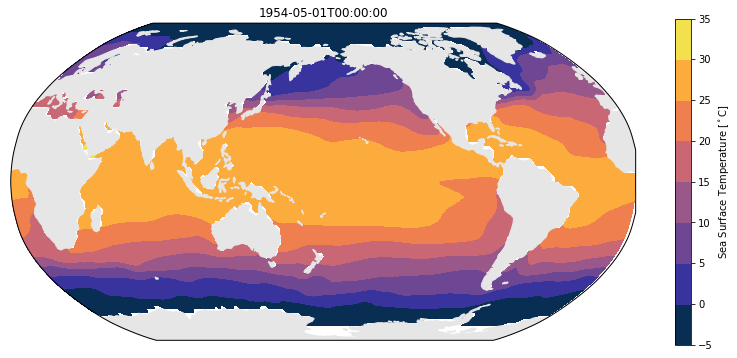

In [113]:
proj = cartopy.crs.Robinson(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
mappable = ax.contourf(nc['lon'][:], nc['lat'][:], nc['sst'][tind], cmap=cmo.thermal, transform=cartopy.crs.PlateCarree())
ax.set_title(time[tind].isoformat())
fig.colorbar(mappable).set_label(r'Sea Surface Temperature [$^\circ$C]')

What if instead we want the index corresponding to May 23, 1954

In [137]:
date = datetime(1954, 5, 23, 0, 0)
# np.where(time==date)
tidx = np.abs(time - date).argmin()

In [138]:
time[tidx]

datetime.datetime(1954, 6, 1, 0, 0)

What is the problem here? There is no data at that exact time.

So what should we do?

---
### *Exercise*

> Search for the time index corresponding to the time in the data file closest to May 23, 1954.

---

Now let's access this data using a different package called `xarray`:

In [9]:
ds = xr.open_dataset('../data/sst.mnmean.v4.nc')  # similar way to read in — also works for nonlocal data addresses
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 1946)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 1854-03-01 ...
  * nbnds      (nbnds) int64 0 1
Data variables:
    time_bnds  (time, nbnds) float64 1.972e+04 1.975e+04 1.975e+04 1.978e+04 ...
    sst        (time, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...
Attributes:
    history: created 10/2014 by CAS using NCDC's ERSST V4 ascii values
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present

Now we can search for data in May 1954:

In [10]:
ds['sst'].sel(time=slice('1954-05','1954-05'))

<xarray.DataArray 'sst' (time: 1, lat: 89, lon: 180)>
array([[[-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 70.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * time     (time) datetime64[ns] 1954-05-01
Attributes:
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc:

Or we can search for the nearest output to May 23, 1954:

In [11]:
ds['sst'].sel(time='1954-05-23', method='nearest')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 70.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    l

Let's plot it!

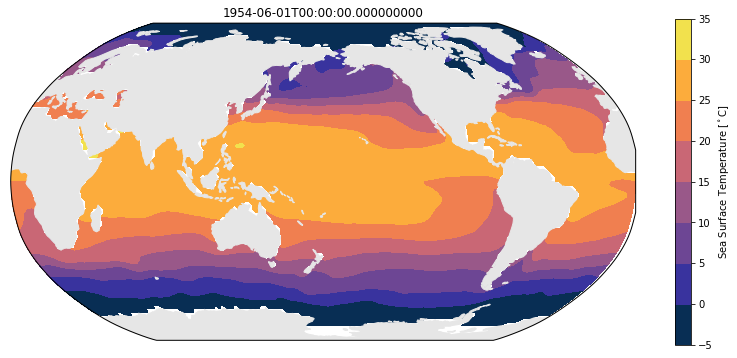

In [12]:
sst = ds['sst'].sel(time='1954-05-23', method='nearest')

proj = cartopy.crs.Robinson(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
mappable = ax.contourf(nc['lon'][:], nc['lat'][:], sst, cmap=cmo.thermal, transform=cartopy.crs.PlateCarree())
ax.set_title(sst.time.data)
fig.colorbar(mappable).set_label(r'Sea Surface Temperature [$^\circ$C]')

Note that you can also just plot against the included coordinates with built-in convenience functions (this is analogous to `pandas` which was for one dimension):

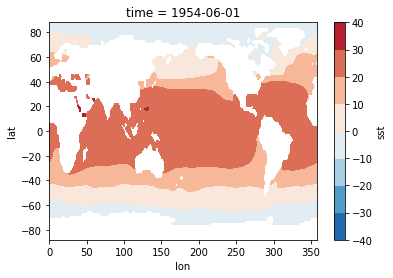

In [13]:
sst.plot.contourf()

## GroupBy

Like in `pandas`, we can use the `groupby` method to do some neat things. Let's group by season and save a new file.

In [14]:
seasonal_mean = ds.groupby('time.season').mean('time')
seasonal_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, season: 4)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * nbnds      (nbnds) int64 0 1
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    time_bnds  (season, nbnds) float64 4.937e+04 4.94e+04 4.931e+04 ...
    sst        (season, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...

Do you remember how many lines of code were required to save a netCDF file from scratch? It is straight-forward, but tedious. Once you are working with data using `xarray`, you can save new, derived files very easily from your data array:

In [139]:
fname = 'output/test.nc'
seasonal_mean.to_netcdf(fname)  # you can't run this in read-only, but I already did for you

OSError: Permission denied

In [16]:
d = netCDF4.Dataset(fname)
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(89), lon(180), season(4), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time_bnds(season,nbnds), float64 sst(season,lat,lon), <class 'str'> season(season)
    groups: 

---
### *Exercise*

> Plot the difference between summer and winter mean sea surface temperature.

---